<div style="width:50%; float:left;">
    <img src="support_files/AIBS_banner.png" width="430" align="left">
</div>

<div style="width:50%; float:right;">
    <img src="support_files/Dipde_Nick_final.png" width="100" height="100" align="right">
</div>

<div style="width:100%; float:left;">
    <hr>
</div>



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h1>Example: Singlepop</h1>
<p> In this example, a single internal dipde population receives from a single external dipde population.  As the background firing rate "`bgfr`" is increased, the steady-state firing rate that the simulation reaches increases as well.  Try adjusting this parameter with the slider bar, or changing the parameterization of the simulation in the function block.

In [1]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [2]:
%matplotlib notebook
import dipde
from IPython.display import display
import matplotlib.pyplot as plt
import ipywidgets as ipw
import logging
logging.disable(logging.CRITICAL)
from dipde.interfaces.jupyter import ProgressBar, Slider
from IPython.display import display
import time

<IPython.core.display.Javascript object>


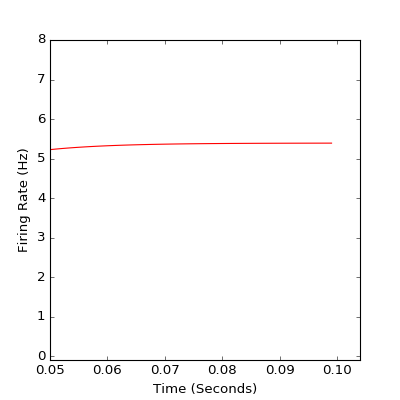

In [3]:
t0 = 0.
dt = .001
dv = .001
v_max = .02
tf = .1
tau_m=.02
weights=.005
window_size = .05

def slow_callback(n):
    time.sleep(.1)

b1 = dipde.ExternalPopulation(100)

slider = Slider(display=True, value=100, min=0, max=200, continuous_update=False)
slider.set_target(b1, 'external_firing_rate')


i1 = dipde.InternalPopulation(v_min=0, tau_m=tau_m, v_max=v_max, dv=dv, update_method='approx')
b1_i1 = dipde.Connection(b1, i1, 1, weights=weights)
network = dipde.Network([b1, i1], [b1_i1], progress=ProgressBar(), update_callback=slow_callback)

fig, ax = plt.subplots(1,1, figsize=(5,5))
i1.plot(xlim=(0,.05), ax=ax, ylim=(0,8), color='r', show=True)

def plot_callback(s):
    
    p = s.network.population_list[1]
    window_points = int(window_size/dt)

    if len(p.t_record) < window_points:

        t_vals = p.t_record
        y_vals = p.firing_rate_record
    else:
        t_vals = p.t_record[-window_points:]
        y_vals = p.firing_rate_record[-window_points:]

    ax.lines[0].set_xdata(t_vals)
    ax.lines[0].set_ydata(y_vals)
    if t_vals[-1] < window_size:
        t_max = window_size
    else:
        t_max = t_vals[-1]*1.05

    ax.set_xlim((t_vals[0],t_max))
    ax.set_ylim((-.1,max(8, max(y_vals)*1.1)))

    fig.canvas.draw()

simulation_configuration = dipde.SimulationConfiguration(dt, tf, t0=t0, checkpoint_period=.2)
simulation = dipde.Simulation(network=network, simulation_configuration=simulation_configuration, checkpoint_callback=plot_callback)
simulation.start()